# CFD Coursework 2: Square Duct

Read DNS data from https://www.cttc.upc.edu/downloads/DuctFlow/

In [45]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

figure_size = (12,8)


## YZ Sections

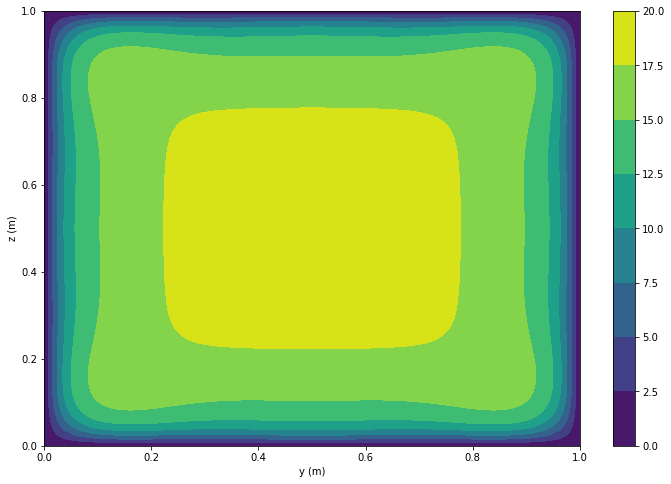

In [29]:
def read_yz_sections(fpath):
    df = pd.read_csv(fpath, delimiter=' ').reset_index()
    df.columns = ['y'] + list(df.iloc[0][1:])
    df = df.drop([0, 1], axis=0).reset_index(drop=True).astype('float')
    return df

re_number = 300
section_data_fpath = f'DuctFlow/YZsections/Re300/DuctFlow_Re{re_number}_YZ.dat'

section_data = read_yz_sections(section_data_fpath)
plt.figure(figsize=figure_size)
plt.tricontourf(section_data['y'], section_data['z'], section_data['<u>']) 
plt.xlabel('y (m)')
plt.ylabel('z (m)')
plt.colorbar()


In [64]:
section_data.columns

Index(['y', 'z', '<u>', '<v>', '<w>', '<u'u'>', '<v'v'>', '<w'w'>', '<u'v'>',
       '<u'w'>', '<v'w'>', '<eps>'],
      dtype='object')

## Profiles

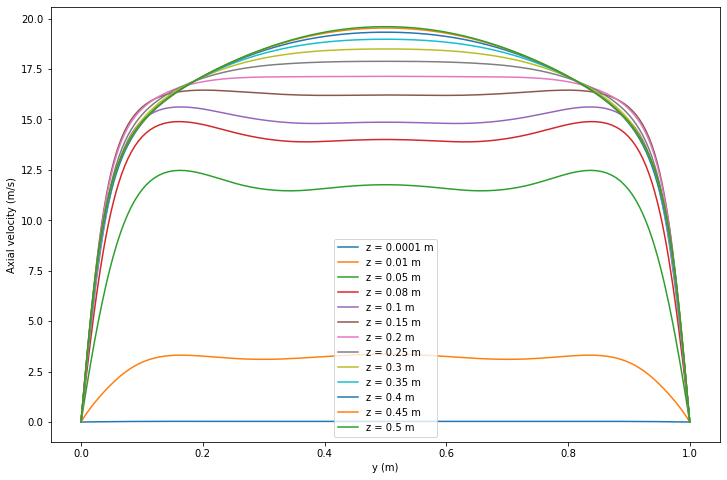

In [66]:
def read_profile_data(fpath):
    df = pd.read_csv(fpath, delimiter=' ', header=None)
    columns = df.iloc[0].dropna().values[1:]
    df = df.iloc[2:].dropna(axis=1)
    df.columns = columns
    df = df.astype(float)
    return df

re_number = 300
profile_dir = f'DuctFlow/profiles/Re{re_number}/'
profile_fpaths = [profile_dir + file_dir for file_dir in os.listdir(profile_dir)]
profile_fpaths.sort()

plt.figure(figsize=figure_size)

for file in profile_fpaths:
    profile_data = read_profile_data(file)
    plt.plot(profile_data['y'].values, profile_data['<u>'].values, label=f'z = {profile_data["z"].values[0]} m')

plt.ylabel('Axial velocity (m/s)')
plt.xlabel('y (m)')
plt.legend()


In [67]:
profile_data.columns

Index(['y', 'z', '<u>', '<v>', '<w>', '<u'u'>', '<v'v'>', '<w'w'>', '<u'v'>',
       '<u'w'>', '<v'w'>', '<eps>'],
      dtype='object')

Text(0.5, 0, 'y (m)')

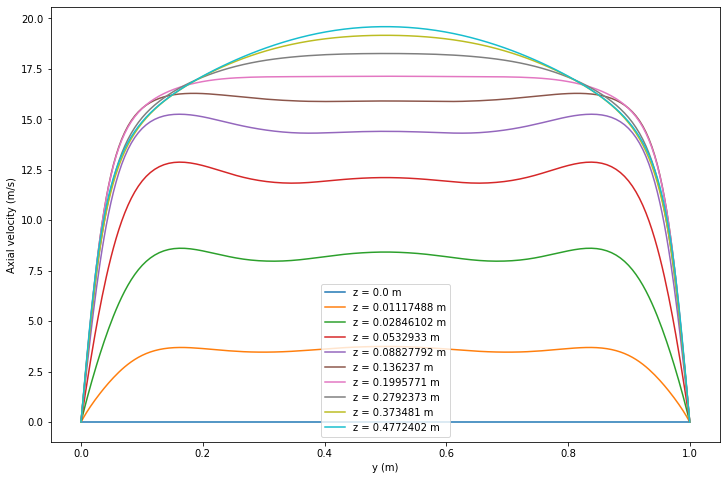

In [63]:
# try to find velocity from section data: should agree with plot above

section_zs = section_data.z.unique()

plt.figure(figsize=(12, 8))

for z in section_zs[:len(section_zs)//2:7]:
    data = section_data[section_data['z'] == z]
    plt.plot(data['y'].values, data['<u>'].values, label=f'z = {data["z"].values[0]} m')
    
plt.legend()
plt.ylabel('Axial velocity (m/s)')
plt.xlabel('y (m)')
